# Primera Sección

Visualizar los municipios despoblados con rojo, y los poblados con verde

In [ ]:
import io
import pandas as pd
from google.colab import files
import geopandas as gpd

In [ ]:
uploaded = files.upload()

Saving poblacion_despo_1_por_municipio_sexo_pib_y_geometry.geojson to poblacion_despo_1_por_municipio_sexo_pib_y_geometry.geojson


In [ ]:
# Read file using gpd.read_file()
mapa = gpd.read_file(io.BytesIO(uploaded.get('poblacion_despo_1_por_municipio_sexo_pib_y_geometry.geojson')))

In [ ]:
mapa.head()

codigo_provincia nombre_provincia CODIGOINE       nombre_municipio  \
0                16           CUENCA     16266  Villarejo-Periesteban   
1                16           CUENCA     16269       Villares del Saz   
2                16           CUENCA     16270            Villarrubio   
3                16           CUENCA     16271               Villarta   
4                16           CUENCA     16272   Villas de la Ventosa   

   mujeres_2023  hombres_2023  total_2023  despoblado_2023  mujeres_2018  \
0           193           194         387                1           194   
1           219           245         464                1           235   
2            93           114         207                1            92   
3           428           420         848                1           413   
4            98           121         219                1            94   

   hombres_2018  ...  mujeres_2003  hombres_2003  total_2003  despoblado_2003  \
0           191  ...         248.0         257.0       505.0                1   
1           231  ...         320.0         329.0       649.0                1   
2           104  ...         130.0         127.0       257.0                1   
3           408  ...         390.0         416.0       806.0                1   
4           139  ...         170.0         192.0       362.0                1   

   mujeres_1998  hombres_1998  total_1998  despoblado_1998       pib  \
0         271.0         277.0       548.0                1   7901.63   
1         369.0         374.0       743.0                1  13745.66   
2         129.0         137.0       266.0                1  11891.05   
3         383.0         411.0       794.0                1  18269.33   
4         183.0         209.0       392.0                1   6484.88   

                                            geometry  
0  MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...  
1  MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...  
2  MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...  
3  MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...  
4  MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...  

[5 rows x 30 columns]

In [ ]:
uploaded = files.upload()

Saving ne_50m_ocean.zip to ne_50m_ocean.zip


In [ ]:
map_oceanos = gpd.read_file(io.BytesIO(uploaded.get('ne_50m_ocean.zip')))

In [ ]:
pip install mapclassify

In [ ]:
import matplotlib.pyplot as plt
import mapclassify
from matplotlib import colors

<Axes: title={'center': 'Menos de 2000 habitantes (rojo) en el año 1998'}, xlabel='Longitud', ylabel='Latitud'>

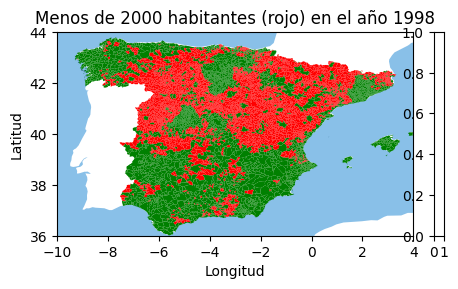

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Menos de 2000 habitantes (rojo) en el año 1998')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cmap = colors.ListedColormap(['green', 'red'])
mapa.plot(column='despoblado_1998', cmap=cmap, ax=ax, legend=False, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Menos de 2000 habitantes (rojo) en el año 2023'}, xlabel='Longitud', ylabel='Latitud'>

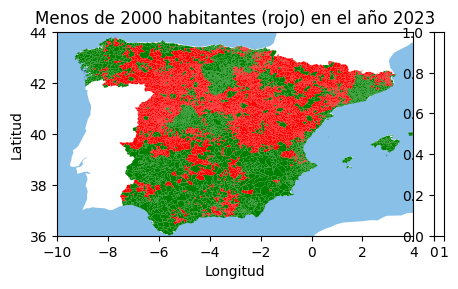

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis([-10, 4, 36, 44])
ax.set_title('Menos de 2000 habitantes (rojo) en el año 2023')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cmap = colors.ListedColormap(['green', 'red'])
mapa.plot(column='despoblado_2013', cmap=cmap, ax=ax, legend=False, zorder=1)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

# Segunda Sección

Considerando la columna despoblamiento analizo que municipios cayeron en esa categoria en los ultimos años

In [ ]:
import io
import pandas as pd
from google.colab import files
import geopandas as gpd

In [ ]:
!pip install mapclassify
import matplotlib.pyplot as plt
import mapclassify
from matplotlib import colors

In [ ]:
uploaded = files.upload()

Saving poblacion_despo_1_por_municipio_sexo_pib_y_geometry.geojson to poblacion_despo_1_por_municipio_sexo_pib_y_geometry.geojson


In [ ]:
mapa = gpd.read_file(io.BytesIO(uploaded.get('poblacion_despo_1_por_municipio_sexo_pib_y_geometry.geojson')))

In [ ]:
uploaded = files.upload()

Saving ne_50m_ocean.zip to ne_50m_ocean.zip


In [ ]:
map_oceanos = gpd.read_file(io.BytesIO(uploaded.get('ne_50m_ocean.zip')))

En muni_pob están los municipios que tenía menos poblacion en 1998 comparada con 2023.

En muni_desp están los municipios que tenía más poblacion en 1998 comparada con 2023

In [ ]:
muni_pob = mapa[(mapa['despoblado_1998'] - mapa['despoblado_2023']) == 1]
muni_desp = mapa[(mapa['despoblado_1998'] - mapa['despoblado_2023']) == -1]
print(muni_pob.shape)
print(muni_desp.shape)

(207, 30)
(160, 30)


<Axes: title={'center': 'Municipios con más población en 2023 comparada con 1998'}, xlabel='Longitud', ylabel='Latitud'>

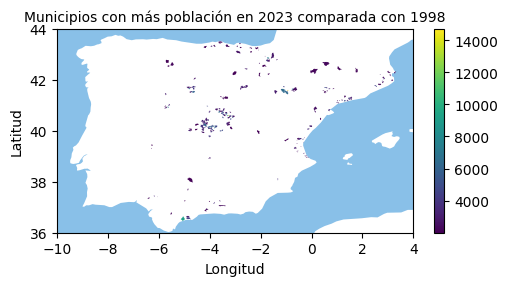

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('Municipios con más población en 2023 comparada con 1998',
             fontdict={'fontsize':10})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

# Generar y cargar el mapa
muni_pob.plot(column='total_2023', cmap='viridis', ax=ax,
              legend=True, cax=cax, zorder=1)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Población en 1998'}, xlabel='Longitud', ylabel='Latitud'>

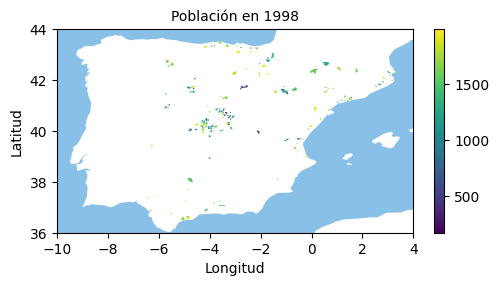

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('Población en 1998',
             fontdict={'fontsize':10})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

# Generar y cargar el mapa
muni_pob.plot(column='total_1998', cmap='viridis', ax=ax,
              legend=True, cax=cax, zorder=1)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Municipios con menos población en 2023 comparada con 1998'}, xlabel='Longitud', ylabel='Latitud'>

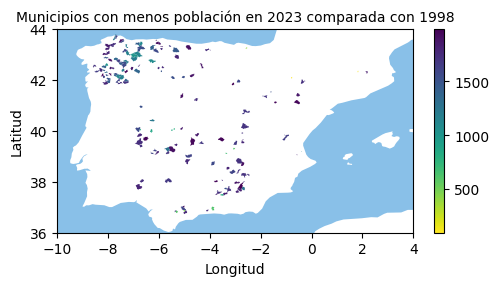

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('Municipios con menos población en 2023 comparada con 1998',
             fontdict={'fontsize':10})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

# Generar y cargar el mapa
muni_desp.plot(column='total_2023', cmap='viridis_r', ax=ax,
              legend=True, cax=cax, zorder=1)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

<Axes: title={'center': 'Poblacion en 1998'}, xlabel='Longitud', ylabel='Latitud'>

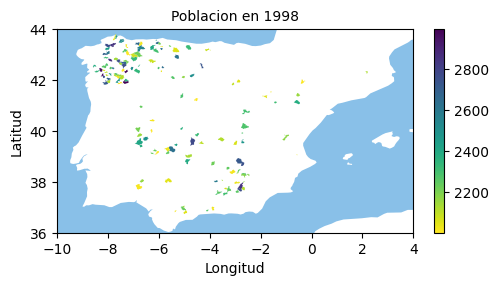

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 4, 36, 44])

# Control del título y los ejes
ax.set_title('Poblacion en 1998',
             fontdict={'fontsize':10})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

# Generar y cargar el mapa
muni_desp.plot(column='total_1998', cmap='viridis_r', ax=ax,
              legend=True, cax=cax, zorder=1)

# Cargar un mapa base con contornos de países
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [ ]:
# PARA PROBAR
mapa_c.explore("POB2021", legend=True)

# Tercera Sección

Análisis preliminar de la población

In [ ]:
import io
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving poblacion_por_municipio_y_sexo_ordenado.csv to poblacion_por_municipio_y_sexo_ordenado.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded.get('poblacion_por_municipio_y_sexo_ordenado.csv')), sep=";", encoding='utf8')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_provincia  8300 non-null   int64  
 1   nombre_provincia  8300 non-null   object 
 2   codigo_municipio  8300 non-null   int64  
 3   nombre_municipio  8300 non-null   object 
 4   mujeres_2023      8296 non-null   float64
 5   hombres_2023      8296 non-null   float64
 6   total_2023        8296 non-null   float64
 7   despoblado_2023   8300 non-null   bool   
 8   mujeres_2018      8289 non-null   float64
 9   hombres_2018      8289 non-null   float64
 10  total_2018        8289 non-null   float64
 11  despoblado_2018   8300 non-null   bool   
 12  mujeres_2013      8282 non-null   float64
 13  hombres_2013      8282 non-null   float64
 14  total_2013        8282 non-null   float64
 15  despoblado_2013   8300 non-null   bool   
 16  mujeres_2008      8276 non-null   float64


In [ ]:
df1 = df.drop(['codigo_provincia', 'codigo_municipio'], axis=1, inplace=False)

In [ ]:
df1.describe()

mujeres_2023  hombres_2023    total_2023  mujeres_2018  hombres_2018  \
count  8.296000e+03  8.296000e+03  8.296000e+03  8.289000e+03  8.289000e+03   
mean   2.994518e+03  2.874287e+03  5.868805e+03  2.915686e+03  2.802659e+03   
std    2.529263e+04  2.259265e+04  4.787911e+04  2.464662e+04  2.192985e+04   
min    0.000000e+00  2.000000e+00  3.000000e+00  1.000000e+00  3.000000e+00   
25%    7.000000e+01  8.700000e+01  1.570000e+02  7.200000e+01  8.700000e+01   
50%    2.605000e+02  2.850000e+02  5.490000e+02  2.600000e+02  2.870000e+02   
75%    1.209250e+03  1.236250e+03  2.442000e+03  1.199000e+03  1.208000e+03   
max    1.776528e+06  1.555507e+06  3.332035e+06  1.723144e+06  1.500190e+06   

         total_2018  mujeres_2013  hombres_2013    total_2013  mujeres_2008  \
count  8.289000e+03  8.282000e+03  8.282000e+03  8.282000e+03  8.276000e+03   
mean   5.718344e+03  2.932001e+03  2.842391e+03  5.774392e+03  2.858275e+03   
std    4.656955e+04  2.454370e+04  2.194247e+04  4.647796e+04  2.436057e+04   
min    5.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00   
25%    1.580000e+02  7.900000e+01  9.400000e+01  1.730000e+02  8.600000e+01   
50%    5.450000e+02  2.810000e+02  3.060000e+02  5.850000e+02  2.900000e+02   
75%    2.415000e+03  1.234000e+03  1.259000e+03  2.483250e+03  1.212000e+03   
max    3.223334e+06  1.712655e+06  1.494592e+06  3.207247e+06  1.701453e+06   

       hombres_2008    total_2008  mujeres_2003  hombres_2003    total_2003  \
count  8.276000e+03  8.276000e+03  8.272000e+03  8.272000e+03  8.272000e+03   
mean   2.801834e+03  5.660110e+03  2.661760e+03  2.582462e+03  5.244222e+03   
std    2.207877e+04  4.643172e+04  2.356106e+04  2.118367e+04  4.473826e+04   
min    4.000000e+00  6.000000e+00  3.000000e+00  3.000000e+00  7.000000e+00   
25%    9.900000e+01  1.860000e+02  9.000000e+01  1.010000e+02  1.910000e+02   
50%    3.165000e+02  6.090000e+02  2.860000e+02  3.030000e+02  5.910000e+02   
75%    1.262250e+03  2.472000e+03  1.116000e+03  1.145750e+03  2.274250e+03   
max    1.511818e+06  3.213271e+06  1.643416e+06  1.449343e+06  3.092759e+06   

       mujeres_1998  hombres_1998    total_1998  
count  8.261000e+03  8.261000e+03  8.261000e+03  
mean   2.505729e+03  2.398817e+03  4.904546e+03  
std    2.225964e+04  1.983140e+04  4.208566e+04  
min    1.000000e+00  3.000000e+00  4.000000e+00  
25%    9.500000e+01  1.040000e+02  1.990000e+02  
50%    2.910000e+02  3.070000e+02  5.950000e+02  
75%    1.099000e+03  1.104000e+03  2.213000e+03  
max    1.535338e+06  1.346168e+06  2.881506e+06